In [170]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage



In [172]:
#load data
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [174]:
# Encode Gender
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])


In [176]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [178]:
#Preprocessing
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [180]:
data.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [182]:
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
data = data.dropna(subset=features)
data = data[features].copy()
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [184]:
#scaling
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,11.0,1.192308,1.000000,4.877551
1,11.0,1.576923,1.000000,9.163265
2,1.0,1.384615,1.081967,1.510204
3,1.0,1.961538,1.081967,8.755102
4,1.0,3.500000,1.163934,4.979592
...,...,...,...,...
195,1.0,4.269231,9.606557,8.959184
196,1.0,6.192308,10.098361,3.755102
197,11.0,3.692308,10.098361,8.448980
198,11.0,3.692308,11.000000,2.734694


In [186]:
#Initialize random centroids
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

centroids = random_centroids(data, 3)

/var/folders/3s/fq69p_hn7_nf6dy7f7xk96740000gn/T/ipykernel_99732/2855227094.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [188]:
centroids

,0,1,2
Gender,11.000000,11.000000,11.000000
Age,2.153846,6.961538,7.153846
Annual Income (k$),6.737705,6.163934,4.196721
Spending Score (1-100),6.612245,6.408163,8.551020


In [190]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)
labels = get_labels(data, centroids)
labels.value_counts()

0    87
1    80
2    33
Name: count, dtype: int64

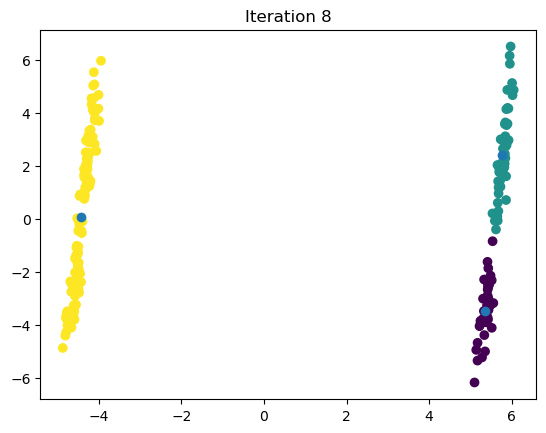

In [192]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()


max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [193]:
print(centroids)

                                0          1         2
Gender                  11.000000  11.000000  1.000000
Age                      2.630535   6.313265  4.228332
Annual Income (k$)       4.172865   4.412047  4.067124
Spending Score (1-100)   8.029728   3.314366  5.571493


In [194]:
# Evaluate Clustering
def evaluate_clustering(X, labels):
    silhouette_avg = silhouette_score(X, labels)
    return silhouette_avg

print("Silhouette Score (K-Means from scratch):", evaluate_clustering(data, labels))


Silhouette Score (K-Means from scratch): 0.45835255811254244


In [198]:
import pandas as pd
import numpy as np

def characterize_clusters(data, labels):
    data_with_labels = data.copy()
    data_with_labels['Cluster'] = labels
    
    cluster_centroids = data_with_labels.groupby('Cluster').mean()
    
    overall_means = data.mean()
    
    results = []

    for cluster_idx, centroid in cluster_centroids.iterrows():
        cluster_info = f"\nCluster {cluster_idx} Characteristics:\n" + "-"*30
        cluster_info += "\nCentroid Values:\n"
        centroid_df = pd.DataFrame(centroid).T  
        cluster_info += centroid_df.to_string() + "\n\nFeature Comparisons to Mean:\n"

        for feature, centroid_value in centroid.items():
            comparison = "above average" if centroid_value > overall_means[feature] else "below average"
            cluster_info += f" - {feature}: {comparison}\n"
        
        interpretation = "\nInterpretation:\n"
        
        if centroid['Age'] > overall_means['Age']:
            interpretation += "This group is predominantly older."
        else:
            interpretation += "This group is predominantly younger."

        if centroid['Annual Income (k$)'] > overall_means['Annual Income (k$)']:
            interpretation += " They have higher income."
        else:
            interpretation += " They have lower income."

        if centroid['Spending Score (1-100)'] > overall_means['Spending Score (1-100)']:
            interpretation += " They are more willing to spend."
        else:
            interpretation += " They are budget-conscious."
        
        cluster_info += interpretation + "\n"
        results.append(cluster_info)

    cluster_summary = "Cluster Centroids (Aligned):\n"
    cluster_summary += cluster_centroids.to_string()
    cluster_summary += "\n\nOverall Means for Comparison:\n"
    cluster_summary += overall_means.to_string()
    cluster_summary += "\n" + "\n".join(results)
    
    print(cluster_summary)

characterize_clusters(data, labels)  

Cluster Centroids (Aligned):
         Gender       Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                              
0          11.0  2.971154            4.852459                8.211735
1          11.0  7.045673            4.886612                3.878401
2           1.0  4.865041            4.627049                6.155794

Overall Means for Comparison:
Gender                    5.400000
Age                       5.009615
Annual Income (k$)        4.734426
Spending Score (1-100)    6.020408

Cluster 0 Characteristics:
------------------------------
Centroid Values:
   Gender       Age  Annual Income (k$)  Spending Score (1-100)
0    11.0  2.971154            4.852459                8.211735

Feature Comparisons to Mean:
 - Gender: above average
 - Age: below average
 - Annual Income (k$): above average
 - Spending Score (1-100): above average

Interpretation:
This group is predominantly younger. They have higher income. They are mor

In [200]:
# Perform Hierarchical Clustering
def hierarchical_clustering(data, n_clusters):
    # Fit Agglomerative Clustering
    model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    h_labels = model.fit_predict(data)
    
    # Linkage matrix for dendrogram
    linkage_matrix = linkage(data, method='ward')
    
    return h_labels, linkage_matrix


In [202]:
def plot_dendrogram(linkage_matrix):
    plt.figure(figsize=(10, 7))
    plt.title("Dendrogram")
    dendrogram(linkage_matrix)
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()


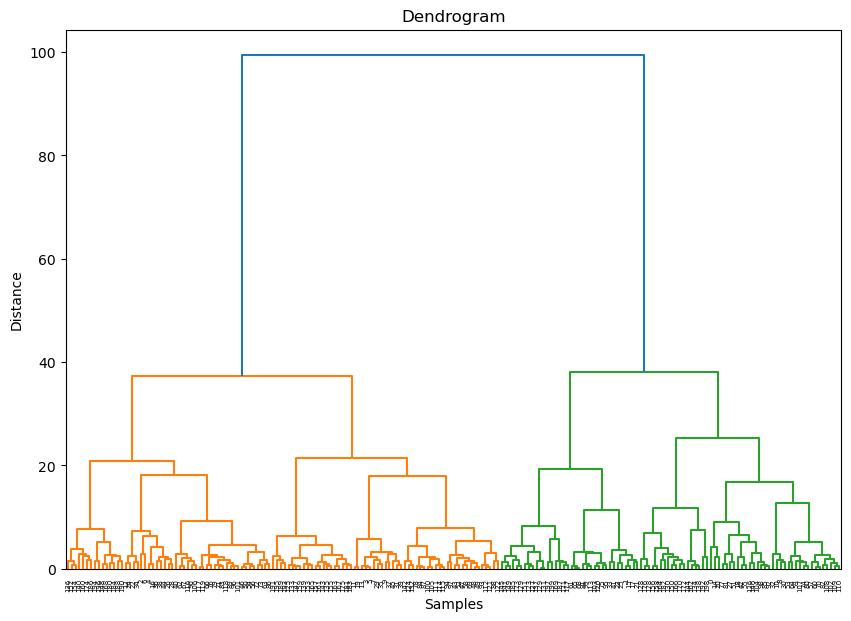

In [204]:
# Perform hierarchical clustering
n_clusters = 3
h_labels, linkage_matrix = hierarchical_clustering(data, n_clusters)

# Plot the dendrogram
plot_dendrogram(linkage_matrix)


In [205]:
def evaluate_clustering(X, labels):
    silhouette_avg = silhouette_score(X, labels)
    return silhouette_avg

print("Silhouette Score (K-Means from scratch):", evaluate_clustering(data, h_labels))


Silhouette Score (K-Means from scratch): 0.44699794312269886


In [206]:
import pandas as pd
import numpy as np

def characterize_clusters(data, labels):
    data_with_labels = data.copy()
    data_with_labels['Cluster'] = labels
    
    cluster_centroids = data_with_labels.groupby('Cluster').mean()
    
    overall_means = data.mean()
    
    results = []

    for cluster_idx, centroid in cluster_centroids.iterrows():
        cluster_info = f"\nCluster {cluster_idx} Characteristics:\n" + "-"*30
        cluster_info += "\nCentroid Values:\n"
        centroid_df = pd.DataFrame(centroid).T  
        cluster_info += centroid_df.to_string() + "\n\nFeature Comparisons to Mean:\n"

        for feature, centroid_value in centroid.items():
            comparison = "above average" if centroid_value > overall_means[feature] else "below average"
            cluster_info += f" - {feature}: {comparison}\n"
        
        interpretation = "\nInterpretation:\n"
        
        if centroid['Age'] > overall_means['Age']:
            interpretation += "This group is predominantly older."
        else:
            interpretation += "This group is predominantly younger."

        if centroid['Annual Income (k$)'] > overall_means['Annual Income (k$)']:
            interpretation += " They have higher income."
        else:
            interpretation += " They have lower income."

        if centroid['Spending Score (1-100)'] > overall_means['Spending Score (1-100)']:
            interpretation += " They are more willing to spend."
        else:
            interpretation += " They are budget-conscious."
        
        cluster_info += interpretation + "\n"
        results.append(cluster_info)

    # Combine and print results
    cluster_summary = "Cluster Centroids (Aligned):\n"
    cluster_summary += cluster_centroids.to_string()
    cluster_summary += "\n\nOverall Means for Comparison:\n"
    cluster_summary += overall_means.to_string()
    cluster_summary += "\n" + "\n".join(results)
    
    print(cluster_summary)

# Example Usage
characterize_clusters(data, h_labels)  # Assuming 'data' is the dataset and 'h_labels' are the cluster labels from hierarchical clustering


Cluster Centroids (Aligned):
         Gender       Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                              
0           1.0  4.865041            4.627049                6.155794
1          11.0  6.776627            4.712169                4.071036
2          11.0  2.907051            5.100638                8.414966

Overall Means for Comparison:
Gender                    5.400000
Age                       5.009615
Annual Income (k$)        4.734426
Spending Score (1-100)    6.020408

Cluster 0 Characteristics:
------------------------------
Centroid Values:
   Gender       Age  Annual Income (k$)  Spending Score (1-100)
0     1.0  4.865041            4.627049                6.155794

Feature Comparisons to Mean:
 - Gender: below average
 - Age: below average
 - Annual Income (k$): below average
 - Spending Score (1-100): above average

Interpretation:
This group is predominantly younger. They have lower income. They are more